In [97]:
import numpy as np
import pandas as pd
#import tensorflow as tf
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import *
from string import *
%matplotlib inline

In [98]:
df = pd.read_csv('data.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
df.columns

Index(['Unnamed: 0', 'RECORD', 'B', 'TAXCLASS', 'LTFRONT', 'LTDEPTH',
       'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'ZIP', 'BLDFRONT', 'BLDDEPTH',
       'ZIP3', 'ZIP4'],
      dtype='object')

In [100]:
df['S1'] = df['LTFRONT']* df['LTDEPTH']
df['S2'] = df['BLDFRONT']* df['BLDDEPTH']
df['S3'] = df['S2'] * df['STORIES']



In [101]:
df['V1'] = df['FULLVAL']
df['V2'] = df['AVLAND']
df['V3'] = df['AVTOT']

In [102]:
df['R1'] = df['V1']/df['S1']

df['R2'] = df['V1']/df['S2']

df['R3'] = df['V1']/df['S3']

df['R4'] = df['V2']/df['S1']

df['R5'] = df['V2']/df['S2']

df['R6'] = df['V2']/df['S3']

df['R7'] = df['V3']/df['S1']

df['R8'] = df['V3']/df['S2']

df['R9'] = df['V3']/df['S3']



In [103]:
fraud = pd.DataFrame()
fraud  = df[['RECORD']]

#fraud['R1Z'] = df['ZIP']

In [104]:
df.columns

Index(['Unnamed: 0', 'RECORD', 'B', 'TAXCLASS', 'LTFRONT', 'LTDEPTH',
       'STORIES', 'FULLVAL', 'AVLAND', 'AVTOT', 'ZIP', 'BLDFRONT', 'BLDDEPTH',
       'ZIP3', 'ZIP4', 'S1', 'S2', 'S3', 'V1', 'V2', 'V3', 'R1', 'R2', 'R3',
       'R4', 'R5', 'R6', 'R7', 'R8', 'R9'],
      dtype='object')

In [105]:
fraud['REC'] = df['RECORD']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
df = df[['R1', 'R2', 'R3',\
       'R4', 'R5', 'R6', 'R7', 'R8', 'R9','ZIP', 'B','TAXCLASS', 'RECORD','ZIP3', 'ZIP4' ]]

In [107]:
fraud.columns

Index(['RECORD', 'REC'], dtype='object')

In [108]:
fraud = fraud.set_index(keys = 'REC')
df = df.set_index(keys = 'RECORD')

In [109]:
fraud = fraud.sort_index()
df = df.sort_index()

In [110]:

a = df.groupby(by = ['ZIP']).agg({'R1':'mean', 'R2':'mean', 'R3':'mean', \
                             'R4':'mean', 'R5':'mean', 'R6':'mean',\
                             'R7':'mean', 'R8':'mean', 'R9':'mean'})

a = df.merge(a, how = 'left', on = 'ZIP', suffixes = ['_x', '_y'])
a.index = range(1,len(a)+1)
fraud['R1Z'] = a['R1_y']/a['R1_x'] 
fraud['R2Z'] = a['R2_y']/a['R2_x'] 
fraud['R3Z'] = a['R3_y']/a['R3_x'] 
fraud['R4Z'] = a['R4_y']/a['R4_x'] 
fraud['R5Z'] = a['R5_y']/a['R5_x'] 
fraud['R6Z'] = a['R6_y']/a['R6_x'] 
fraud['R7Z'] = a['R7_y']/a['R7_x'] 
fraud['R8Z'] = a['R8_y']/a['R8_x'] 
fraud['R9Z'] = a['R9_y']/a['R9_x'] 
fraud = fraud.sort_index()
df = df.sort_index()

In [111]:
a.columns

Index(['R1_x', 'R2_x', 'R3_x', 'R4_x', 'R5_x', 'R6_x', 'R7_x', 'R8_x', 'R9_x',
       'ZIP', 'B', 'TAXCLASS', 'ZIP3', 'ZIP4', 'R1_y', 'R2_y', 'R3_y', 'R4_y',
       'R5_y', 'R6_y', 'R7_y', 'R8_y', 'R9_y'],
      dtype='object')

In [112]:
fraud = fraud.sort_index()
df = df.sort_index()

In [113]:
a = df.groupby(by = ['B']).agg({'R1':'mean', 'R2':'mean', 'R3':'mean', \
                             'R4':'mean', 'R5':'mean', 'R6':'mean',\
                             'R7':'mean', 'R8':'mean', 'R9':'mean'})

a = df.merge(a, how = 'left', on = 'B', suffixes = ['_x', '_y'])
a.index = range(1,len(a)+1)


fraud['R1B'] = a['R1_y']/a['R1_x'] 
fraud['R2B'] = a['R2_y']/a['R2_x'] 
fraud['R3B'] = a['R3_y']/a['R3_x'] 
fraud['R4B'] = a['R4_y']/a['R4_x'] 
fraud['R5B'] = a['R5_y']/a['R5_x'] 
fraud['R6B'] = a['R6_y']/a['R6_x'] 
fraud['R7B'] = a['R7_y']/a['R7_x'] 
fraud['R8B'] = a['R8_y']/a['R8_x'] 
fraud['R9B'] = a['R9_y']/a['R9_x'] 


fraud = fraud.sort_index()
df = df.sort_index()

In [114]:
a = df.groupby(by = ['TAXCLASS']).agg({'R1':'mean', 'R2':'mean', 'R3':'mean', \
                             'R4':'mean', 'R5':'mean', 'R6':'mean',\
                             'R7':'mean', 'R8':'mean', 'R9':'mean'})

a = df.merge(a, how = 'left', on = 'TAXCLASS', suffixes = ['_x', '_y'])
a.index = range(1,len(a)+1)

fraud['R1T'] = a['R1_y']/a['R1_x'] 
fraud['R2T'] = a['R2_y']/a['R2_x'] 
fraud['R3T'] = a['R3_y']/a['R3_x'] 
fraud['R4T'] = a['R4_y']/a['R4_x'] 
fraud['R5T'] = a['R5_y']/a['R5_x'] 
fraud['R6T'] = a['R6_y']/a['R6_x'] 
fraud['R7T'] = a['R7_y']/a['R7_x'] 
fraud['R8T'] = a['R8_y']/a['R8_x'] 
fraud['R9T'] = a['R9_y']/a['R9_x'] 


fraud = fraud.sort_index()
df = df.sort_index()

In [115]:
#ZIP3
a = df.groupby(by = ['ZIP3']).agg({'R1':'mean', 'R2':'mean', 'R3':'mean', \
                             'R4':'mean', 'R5':'mean', 'R6':'mean',\
                             'R7':'mean', 'R8':'mean', 'R9':'mean'})

a = df.merge(a, how = 'left', on = 'ZIP3', suffixes = ['_x', '_y'])
a.index = range(1,len(a)+1)


fraud['R1Z3'] = a['R1_y']/a['R1_x'] 
fraud['R2Z3'] = a['R2_y']/a['R2_x'] 
fraud['R3Z3'] = a['R3_y']/a['R3_x'] 
fraud['R4Z3'] = a['R4_y']/a['R4_x'] 
fraud['R5Z3'] = a['R5_y']/a['R5_x'] 
fraud['R6Z3'] = a['R6_y']/a['R6_x'] 
fraud['R7Z3'] = a['R7_y']/a['R7_x'] 
fraud['R8Z3'] = a['R8_y']/a['R8_x'] 
fraud['R9Z3'] = a['R9_y']/a['R9_x'] 


fraud = fraud.sort_index()
df = df.sort_index()

In [116]:
#all
a = df.groupby(by = ['ZIP3','ZIP','B','TAXCLASS']).agg({'R1':'mean', 'R2':'mean', 'R3':'mean', \
                             'R4':'mean', 'R5':'mean', 'R6':'mean',\
                             'R7':'mean', 'R8':'mean', 'R9':'mean'})

a = df.merge(a, how = 'left', on =['ZIP3','ZIP','B','TAXCLASS'], suffixes = ['_x', '_y'])
a.index = range(1,len(a)+1)




fraud['R1A'] = df['R1']/np.mean(df['R1'])

fraud['R2A'] = df['R2']/np.mean(df['R2'])
fraud['R3A'] = df['R3']/np.mean(df['R3'])
fraud['R4A'] = df['R4']/np.mean(df['R4'])
fraud['R5A'] = df['R5']/np.mean(df['R5'])

fraud['R6A'] = df['R6']/np.mean(df['R6'])
fraud['R7A'] = df['R7']/np.mean(df['R7'])
fraud['R8A'] = df['R8']/np.mean(df['R8'])

fraud['R9A'] = df['R9']/np.mean(df['R9'])

fraud = fraud.sort_index()
df = df.sort_index()


In [117]:
x = fraud

In [118]:
fraud = x

In [119]:
a = x.columns[0]
del fraud['RECORD']
x.head()

,R1Z,R2Z,R3Z,R4Z,R5Z,R6Z,R7Z,R8Z,R9Z,R1B,...,R9Z3,R1A,R2A,R3A,R4A,R5A,R6A,R7A,R8A,R9A
REC,,,,,,,,,,,,,,,,,,,,,
1,8.280451,0.642961,10.127657,5.871127,0.722412,19.710189,7.569794,0.598799,9.629827,9.145094,...,6.265302,0.118639,1.149852,0.050498,0.718429,3.697244,0.150624,0.589036,4.514115,0.219784
2,0.009771,0.070998,1.118328,0.018526,0.213316,5.820084,0.008933,0.066121,1.063355,0.010791,...,0.691834,100.539073,10.413146,0.457316,227.673718,12.521018,0.510101,499.171502,40.880165,1.990377
3,1.294204,1.670403,1.578690,0.486252,0.994518,1.628059,1.183131,1.555670,1.501088,1.429345,...,0.976630,0.759064,0.442594,0.323958,8.674481,2.685654,1.823539,3.768716,1.737545,1.409962
4,3.776633,0.522479,0.329195,1.358659,0.297857,0.325067,3.452509,0.486592,0.313013,4.170988,...,0.203651,0.260122,1.415004,1.553575,3.104522,8.967175,9.132967,1.291491,5.555055,6.761624
5,0.506397,0.008147,0.002567,0.159480,0.004066,0.002219,0.462937,0.007587,0.002440,0.559275,...,0.001588,1.939947,90.745455,199.264232,26.448382,656.922092,1338.135567,9.631739,356.250579,867.257847


In [120]:
x.columns

Index(['R1Z', 'R2Z', 'R3Z', 'R4Z', 'R5Z', 'R6Z', 'R7Z', 'R8Z', 'R9Z', 'R1B',
       'R2B', 'R3B', 'R4B', 'R5B', 'R6B', 'R7B', 'R8B', 'R9B', 'R1T', 'R2T',
       'R3T', 'R4T', 'R5T', 'R6T', 'R7T', 'R8T', 'R9T', 'R1Z3', 'R2Z3', 'R3Z3',
       'R4Z3', 'R5Z3', 'R6Z3', 'R7Z3', 'R8Z3', 'R9Z3', 'R1A', 'R2A', 'R3A',
       'R4A', 'R5A', 'R6A', 'R7A', 'R8A', 'R9A'],
      dtype='object')

In [121]:
fraud=preprocessing.scale(fraud)#Zscale

In [122]:
fraud.shape

(1070994, 45)

In [123]:
#fraud.head()

In [124]:
pca=PCA(n_components=8,copy=False)
fraud=pca.fit_transform(fraud)#pca

In [125]:
fraud=pd.DataFrame(preprocessing.scale(fraud),columns = ['component1', 'component2', 'component3', 
                                                             'component4', 'component5', 'component6', 
                                                             'component7', 'component8'])#Zscale

In [126]:
fraud.head(10)

,component1,component2,component3,component4,component5,component6,component7,component8
0,-0.027229,0.001825,-0.010052,-0.002117,0.024798,0.010526,-0.031064,0.002539
1,-0.036909,2.425329,-0.005618,-0.008930,0.107193,0.217079,22.761043,0.000122
2,-0.029482,0.020831,-0.016816,-0.002371,0.027259,0.012384,0.219620,0.001111
3,-0.029529,0.094449,-0.013227,-0.002084,0.026511,0.011663,0.015622,0.000242
4,-0.035169,12.993015,0.184587,0.005430,-0.028909,-0.022051,-2.036868,-0.000031
5,-0.027970,0.022870,-0.017630,-0.002536,0.024361,0.008708,0.275186,0.009054
6,-0.032371,6.739750,0.089476,0.001961,-0.003235,-0.008355,-1.358393,-0.000074
7,-0.030434,0.435500,-0.010675,-0.002840,0.026554,0.013459,0.361300,0.000848
8,-0.022749,-0.029156,-0.017340,-0.003432,0.015412,-0.000882,0.011972,0.021179
9,-0.025103,-0.022482,-0.017488,-0.003383,0.019062,0.002928,0.044340,0.014913


In [127]:
cols = fraud.columns

In [128]:
frauds = fraud

In [129]:
fraud = frauds

In [130]:
for i in cols:
    fraud[i] = fraud[i].apply(lambda x: x**2)

In [131]:
#del fraud['score']

In [132]:
#uu = fraud.apply(lambda x: x.sum()**0.5, axis  = 1)

In [133]:
fraud['score']  = fraud.sum(axis = 1)

In [134]:
fraud['score'] = fraud['score'].apply(lambda x: x**0.5)

In [135]:
#heuristic['score'] = fraud['score']

In [136]:
hello = fraud[['score']]

In [137]:
hello.head()

,score
0,0.050472
1,22.891208
2,0.225215
3,0.105142
4,13.153096


In [138]:
fraud = frauds
#aaa
fraud.head()
del fraud['score']

In [139]:
# import tensorflow and keras for autoencoder neural net work
import pickle
from scipy import stats
import tensorflow as tf
# from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [140]:
## autoencoder model  --- takes time to run
components_train = fraud.values

input_dim = fraud.shape[1]
encoding_dim =4



input_layer = Input(shape=(input_dim, ))
#encoder = Dense(encoding_dim, activation="elu", 
#               activity_regularizer=regularizers.l1(10e-5))(input_layer)    # for classification variables

encoder = Dense(int(encoding_dim ), activation="relu")(input_layer)
decoder = Dense(int(encoding_dim ), activation='elu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)


nb_epoch = 30
batch_size = 512
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath="model.h5",
                               verbose=0,
                               save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs',
                          histogram_freq=0,
                          write_graph=True,
                          write_images=True)
history = autoencoder.fit(components_train, components_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                   # validation_data=(X_test, X_test),
                    verbose=1,
                   callbacks=[checkpointer, tensorboard]
                    ).history

Epoch 1/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 127515.9535 - acc: 0.0510
Epoch 2/30
  68096/1070994 [>.............................] - ETA: 2s - loss: 19978.0955 - acc: 0.0356

/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


1070994/1070994 [==============================] - 2s 2us/step - loss: 124758.5812 - acc: 0.0405
Epoch 3/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 122774.1482 - acc: 0.0452
Epoch 4/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 120071.2351 - acc: 0.0253
Epoch 5/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 116120.6577 - acc: 0.0090
Epoch 6/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 112131.9612 - acc: 0.0061
Epoch 7/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 108547.0599 - acc: 0.0056
Epoch 8/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 105811.7146 - acc: 0.0053
Epoch 9/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 102245.0049 - acc: 0.0053
Epoch 10/30
1070994/1070994 [==============================] - 2s 2us/step - loss: 99281.8852 - acc: 0.0050
Epoch 11/30
1070994/1070994 [==========

In [141]:
#components_train

In [144]:
predictions = autoencoder.predict(components_train)
predictions

array([[0.0000000e+00, 4.2756677e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 2.0290017e-03],
       [0.0000000e+00, 1.9688210e+02, 0.0000000e+00, ..., 0.0000000e+00,
        1.4149045e+02, 0.0000000e+00],
       [0.0000000e+00, 7.0408583e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 4.4470191e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7015934e-03],
       [0.0000000e+00, 4.4206500e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7497540e-03],
       [0.0000000e+00, 4.3702245e-02, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.8537045e-03]], dtype=float32)

In [145]:

predictions = pd.DataFrame.from_records(predictions, columns = ['component1', 'component2', 'component3', 
                                                             'component4', 'component5', 'component6', 
                                                             'component7', 'component8'] ) 


In [146]:
names = ['component1', 'component2', 'component3', 'component4', 'component5', 'component6', 'component7', 
         'component8']
for column in names:
    predictions[''.join([column, '_', "diff"])] = abs(fraud.loc[:,column] - predictions.loc[:,column])

In [147]:
predictions.head()

,component1,component2,component3,component4,component5,component6,component7,component8,component1_diff,component2_diff,component3_diff,component4_diff,component5_diff,component6_diff,component7_diff,component8_diff
0,0.0,0.042757,0.0,0.000646,0.000000,0.0,0.000000,0.002029,0.000741,0.042753,0.000101,0.000641,0.000615,0.000111,0.000965,2.022553e-03
1,0.0,196.882095,0.0,0.000000,6.781524,0.0,141.490448,0.000000,0.001362,190.999877,0.000032,0.000080,6.770034,0.047123,376.574632,1.498176e-08
2,0.0,0.070409,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000869,0.069975,0.000283,0.000006,0.000743,0.000153,0.048233,1.234938e-06
3,0.0,0.052126,0.0,0.000000,0.000000,0.0,0.000000,0.000900,0.000872,0.043205,0.000175,0.000004,0.000703,0.000136,0.000244,9.003886e-04
4,0.0,165.205536,0.0,0.000000,0.000000,0.0,12.763168,0.000000,0.001237,3.612903,0.034072,0.000029,0.000836,0.000486,8.614337,9.764320e-10


In [148]:
# autoencoder error score 
predictions['autoencodererr_score'] =  predictions.loc[:, 'component1_diff':'component8_diff'].apply(lambda x:x*x).apply(sum, axis =1)**0.5


In [149]:
processed_df= predictions[['autoencodererr_score']]

In [150]:
processed_df.head()


,autoencodererr_score
0,0.042828
1,422.297575
2,0.084996
3,0.043230
4,9.341361


In [151]:
processed_df['outlier_score'] = hello


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [152]:
#processed_df['autoencodererr_rank'] = processed_df.autoencodererr_score.argsort()
#processed_df['fraud_rank'] = processed_df[['outlier_rank', 'autoencodererr_rank']].apply(min, axis = 1)
#processed_df['fraud_score'] = processed_df[['outlier_score', 'autoencodererr_score']].apply(max, axis = 1)

#Top10_FraudRecords = processed_df.sort_values(["fraud_score"], ascending = False).head(10)


In [153]:
processed_df.head()

,autoencodererr_score,outlier_score
0,0.042828,0.050472
1,422.297575,22.891208
2,0.084996,0.225215
3,0.043230,0.105142
4,9.341361,13.153096


In [154]:
del processed_df['outlier_rank']

KeyError: 'outlier_rank'

In [155]:
max(processed_df['autoencodererr_score'])

641472.5849701522

In [156]:
processed_df.columns = ['s1', 's2']

In [157]:
processed_df['rankorder']= processed_df['s1'].rank(method='first', ascending = True)
processed_df = processed_df.sort_values(by = 's1', ascending = False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [158]:
processed_df.head()

,s1,s2,rankorder
996721,641472.584970,1013.607085,1070994.0
132748,153443.395289,430.593719,1070993.0
565391,98451.946528,441.673571,1070992.0
7041,68963.995892,308.436071,1070990.0
7040,68963.995892,308.436071,1070989.0


In [159]:
auto = processed_df[['s2']]

In [160]:
del processed_df['s2']

In [161]:
auto['rankorders']= auto['s2'].rank(method='first', ascending = True)
auto = auto.sort_values(by = 's2', ascending = False)

In [162]:
auto.head()
del auto['rankorder']

KeyError: 'rankorder'

In [163]:
#auto = (auto['rankorder'] + processed_df['rankorder'])/2

In [164]:
auto = auto.merge(processed_df, left_index=True, right_index=True)

In [165]:
auto['final'] = auto.apply(lambda x: (x['rankorder'] + x['rankorders'])/2, axis = 1)

In [166]:
auto = auto.sort_values(by = 'final', ascending=False)

In [170]:
auto.shape

(1070994, 5)

In [167]:
auto[:12]

,s2,rankorders,s1,rankorder,final
996721,1013.607085,1070994.0,641472.584970,1070994.0,1070994.0
565391,441.673571,1070987.0,98451.946528,1070992.0,1070989.5
132748,430.593719,1070986.0,153443.395289,1070993.0,1070989.5
7042,308.436071,1070983.0,68963.995892,1070991.0,1070987.0
649716,554.183014,1070991.0,60257.193276,1070980.0,1070985.5
691985,540.237284,1070990.0,56787.285393,1070979.0,1070984.5
632815,726.029373,1070993.0,31729.127907,1070975.0,1070984.0
1053858,487.268887,1070989.0,51006.035005,1070978.0,1070983.5
718882,695.222613,1070992.0,16673.406191,1070974.0,1070983.0
111419,450.295884,1070988.0,43260.522471,1070977.0,1070982.5


In [1]:
plotdata=auto.reset_index()
xhigh=100000
temp=plotdata[plotdata['s1']>=10000]
sns.distplot(temp['s1'],bins=50,kde=True)
plt.ylabel('')
plt.xlabel('Score 1 above 10000')
plt.xlim(0,xhigh)

NameError: name 'auto' is not defined

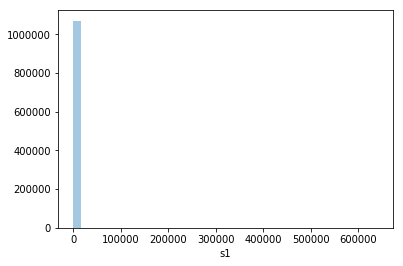

In [181]:
import seaborn as sns
#xhigh=250
#plt.xlim(0,xhigh)
#temp=auto[auto['LTFRONT']<= xhigh]
sns.distplot(auto.s1,bins=40, kde=False)
#plt.ylabel('')